In [1]:
%load_ext autoreload

In [1]:
import torch
from rambo_generator import FlatInvertiblePhasespace
#from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from utils import *
torch.set_default_dtype(torch.double)

In [2]:
import sys
sys.path.append("/home/valsdav/code/MEM/LHAPDF-6.5.3_install/lib/python3.9/site-packages")
import lhapdf
pdf = lhapdf.mkPDF("NNPDF40_nnlo_hessian_pdfas",0)

LHAPDF 6.5.3 loading /opt/LHAPDF/share/LHAPDF/NNPDF40_nnlo_hessian_pdfas/NNPDF40_nnlo_hessian_pdfas_0000.dat
NNPDF40_nnlo_hessian_pdfas PDF set, member #0, version 1; LHAPDF ID = 331600


In [3]:
TOP_MASS = 172.76
HIGGS_MASS = 125.25
E_CM = 13000
final_masses = torch.tensor([HIGGS_MASS, TOP_MASS, TOP_MASS], requires_grad=False)

In [4]:
gen = FlatInvertiblePhasespace([0.,0.],[HIGGS_MASS, TOP_MASS, TOP_MASS], 
                                   pdf=pdf, pdf_active=True, tau=False)
gen_tau = FlatInvertiblePhasespace([0.,0.],[HIGGS_MASS, TOP_MASS, TOP_MASS], 
                                   pdf=pdf, pdf_active=True, tau=True)

In [5]:
gen.nDimPhaseSpace()

5

In [6]:
FlatInvertiblePhasespace.get_flatWeights(13000, 3)

21291.052028166854

generateKinematics_batch(self, E_cm, random_variables_full, pT_mincut=-1, delR_mincut=-1, rap_maxcut=-1,pdgs=[0,0]):

In [73]:
r_initial = torch.rand(100000, 7)

In [74]:
r_initial = r_initial[torch.sqrt(r_initial[:,-2]*r_initial[:,-1])*E_CM>torch.sum(final_masses)]

In [75]:
r_initial.shape

torch.Size([98989, 7])

In [76]:
%%time
p, w, x1, x2 = gen.generateKinematics_batch(E_CM, r_initial, pdgs=[21,21])
p_tau, w_tau, x1_tau, x2_tau = gen_tau.generateKinematics_batch(E_CM, r_initial, pdgs=[21,21])

CPU times: user 7.33 s, sys: 59.1 ms, total: 7.39 s
Wall time: 4.39 s


In [77]:
torch.sum(torch.isnan(p))

tensor(0)

In [55]:
torch.sum(torch.isnan(p))

tensor(5844)

## Debugging plots

NameError: name 'w_tau' is not defined

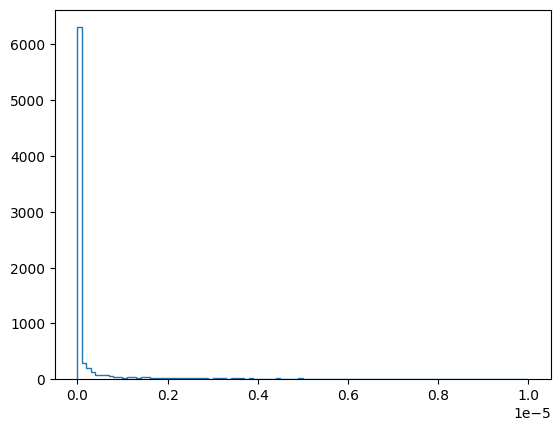

In [13]:
plt.hist(w, bins=100,range=(0,1e-5),histtype="step", label="Tau Off")
plt.hist(w_tau, bins=100, range=(0,1e-5), histtype="step", label="Tau ON")
#plt.yscale("log")
plt.xlabel("Weight")
plt.legend()

NameError: name 'p_tau' is not defined

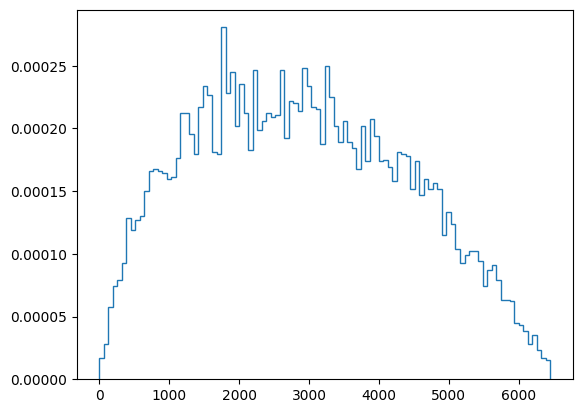

In [14]:
plt.hist(p[:,0,0], bins=100, density=True, histtype="step", label="Tau Off")
plt.hist(p_tau[:,0,0], bins=100, density=True, histtype="step", label="Tau on")
plt.xlabel("Gluon En")
plt.legend()

NameError: name 'p_tau' is not defined

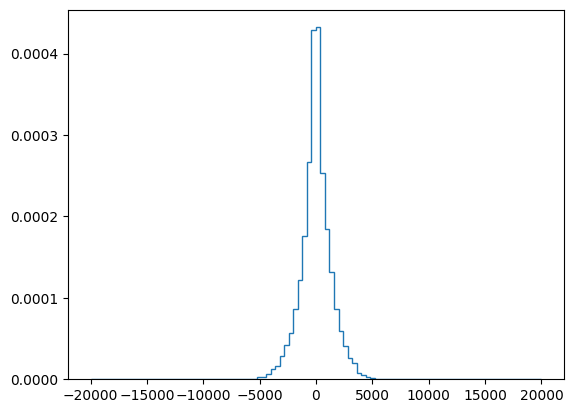

In [15]:
plt.hist(p[:,2,3], bins=100, range=(-20000,20000), density=True, histtype="step", label="No tau")
plt.hist(p_tau[:,2,3], bins=100,range=(-20000,20000),  density=True, histtype="step", label="tau")
#plt.hist(p_lab[:,2,3], bins=100,range=(-20000,20000),  density=True, histtype="step", label="tau")
plt.xlabel("Higgs Pz")
plt.legend()

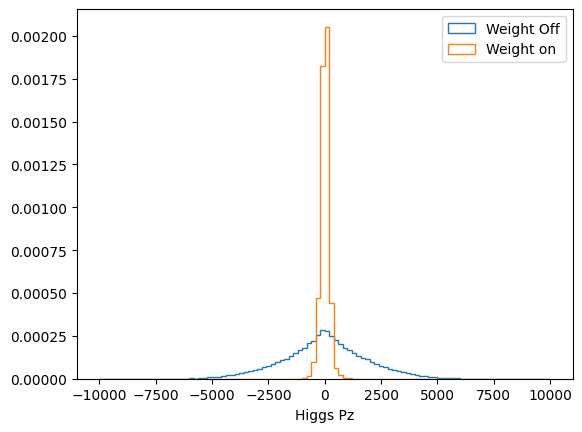

In [28]:
plt.hist(p_tau[:,2,3], bins=100, range=(-10000,10000), density=True, histtype="step", label="Weight Off")
plt.hist(p_tau[:,2,3], weights=w_tau, bins=100,range=(-10000,10000),  density=True, histtype="step", label="Weight on")
plt.xlabel("Higgs Pz")
plt.legend()

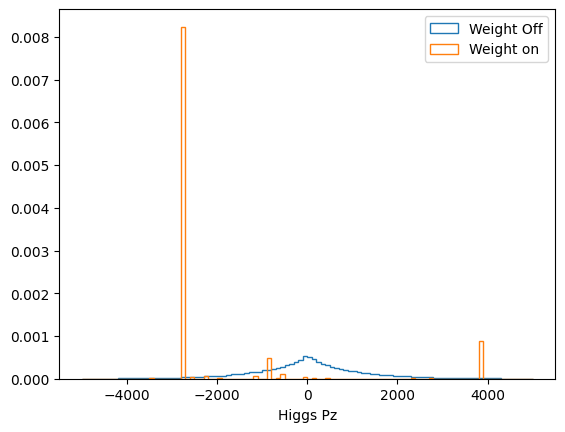

In [29]:
plt.hist(p[:,2,3], bins=100, range=(-5000,5000), density=True, histtype="step", label="Weight Off")
plt.hist(p[:,2,3], weights=w, bins=100,range=(-5000,5000),  density=True, histtype="step", label="Weight on")
plt.xlabel("Higgs Pz")
plt.legend()

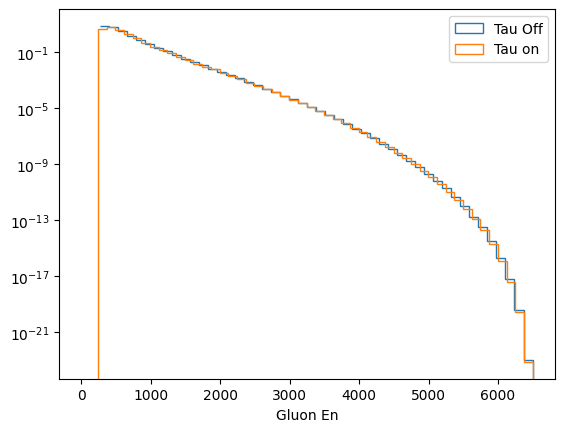

In [46]:
plt.hist(p[:,0,0], weights=w, bins=50,  histtype="step", label="Tau Off")
plt.hist(p_tau[:,0,0], weights=w_tau, bins=50, histtype="step", label="Tau on")
plt.xlabel("Gluon En")
plt.yscale("log")
plt.legend()

Text(0.5, 0, 'Pz')

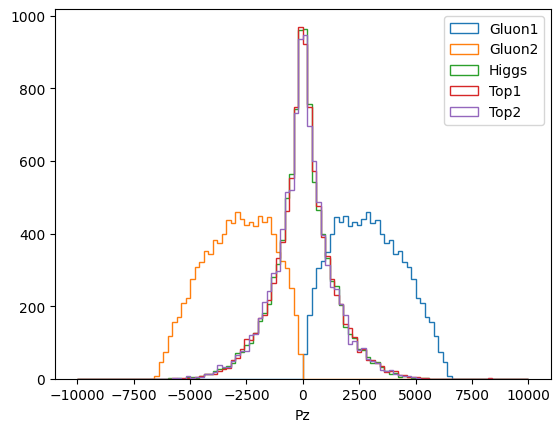

In [16]:
plt.hist(p[:,0,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(p[:,1,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,3], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

Text(0.5, 0, 'En')

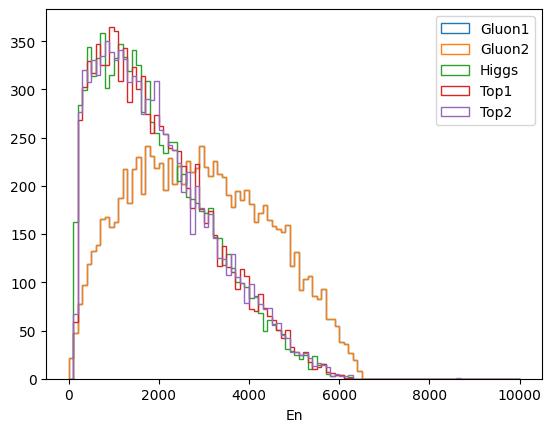

In [17]:
plt.hist(p[:,0,0], bins=100, range=(0,1e4), histtype="step", label="Gluon1")
plt.hist(p[:,1,0], bins=100, range=(0,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,0], bins=100, range=(0,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,0], bins=100, range=(0,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,0], bins=100, range=(0,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("En")

Text(0.5, 0, 'Px')

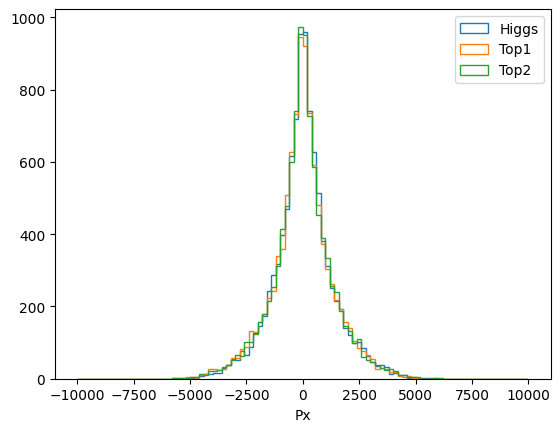

In [18]:
#plt.hist(p[:,0,1], bins=100, range=(0,1e4), histtype="step", label="Gluon1")
#plt.hist(p[:,1,1], bins=100, range=(0,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,1], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

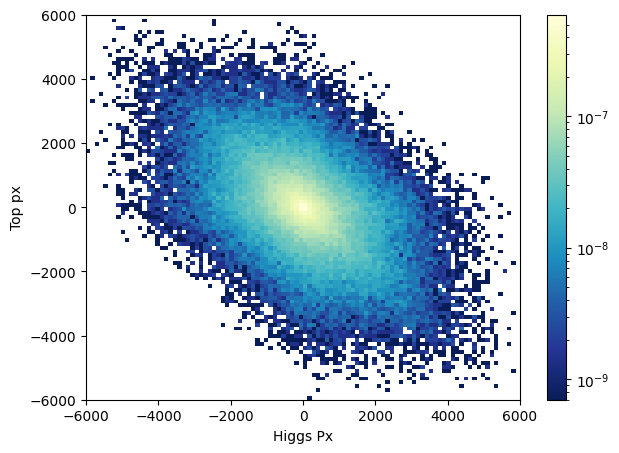

In [55]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,2,1].numpy(),p[:,3,1].numpy(), range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Px")
plt.ylabel("Top px")
plt.colorbar()

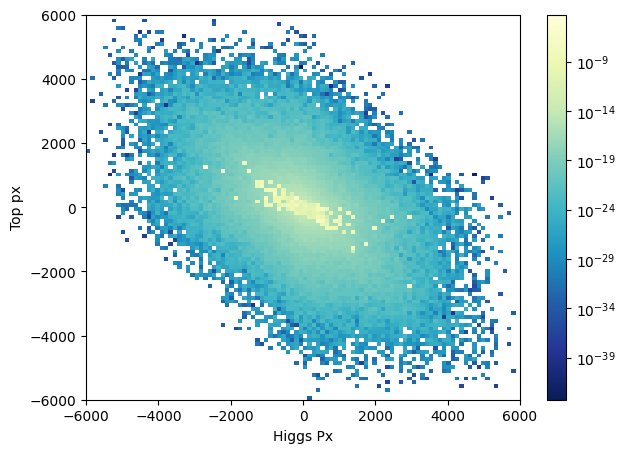

In [56]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,2,1].numpy(),p[:,3,1].numpy(),
           weights= w, range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Px")
plt.ylabel("Top px")
plt.colorbar()

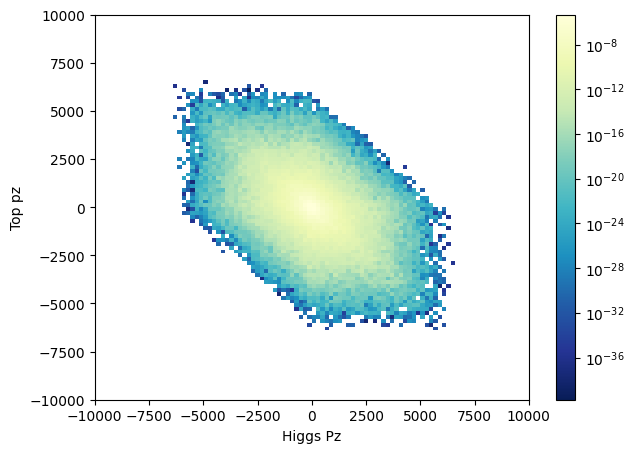

In [57]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,2,3].numpy(),p_tau[:,3,3].numpy(),
           weights= w_tau, range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Pz")
plt.ylabel("Top pz")
plt.colorbar()

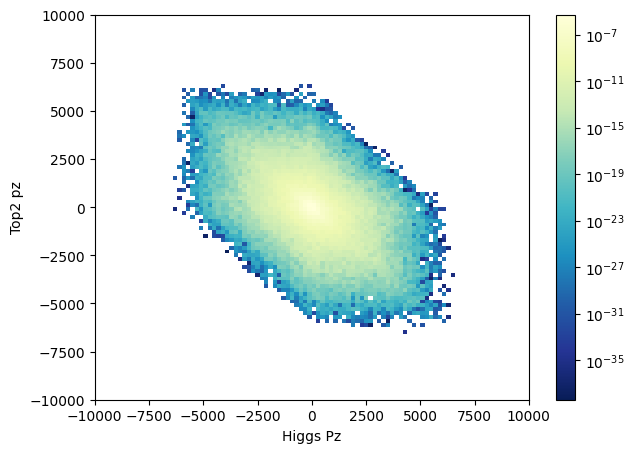

In [58]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,2,3].numpy(),p_tau[:,4,3].numpy(),
           weights= w_tau, range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

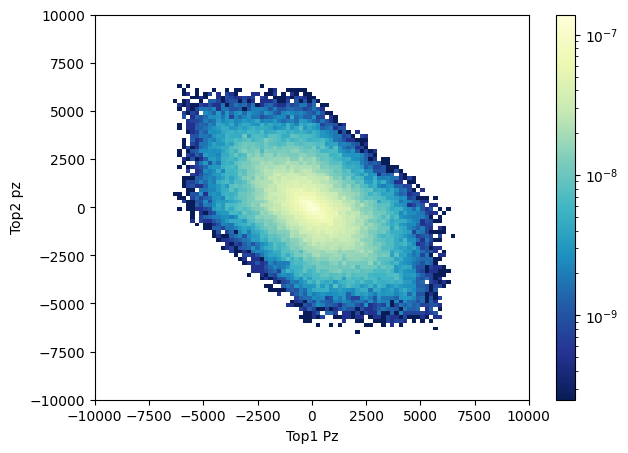

In [59]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,3,3].numpy(),p_tau[:,4,3].numpy(),
           range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Top1 Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

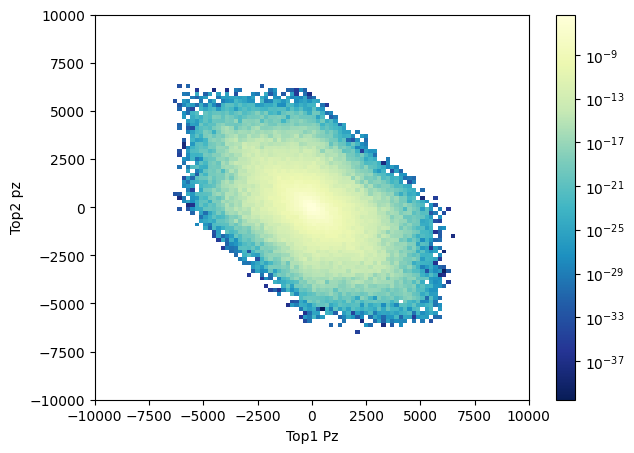

In [60]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,3,3].numpy(),p_tau[:,4,3].numpy(),
           weights= w_tau, range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Top1 Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

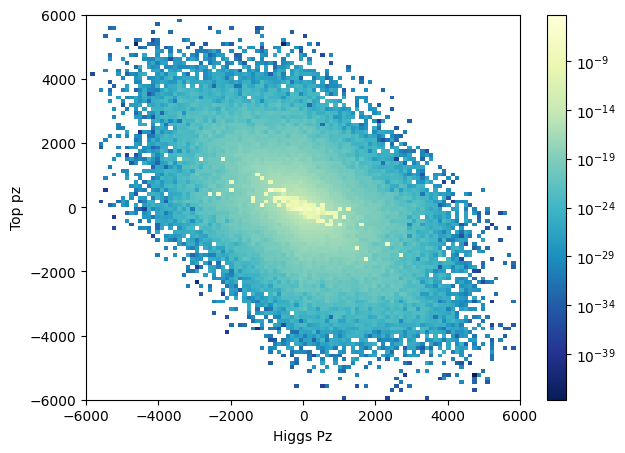

In [61]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,2,3].numpy(),p[:,3,3].numpy(),
           weights= w, range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Pz")
plt.ylabel("Top pz")
plt.colorbar()

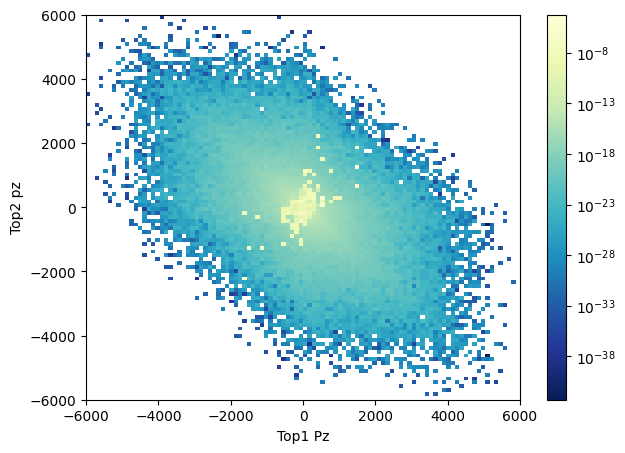

In [62]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,3,3].numpy(),p[:,4,3].numpy(),
           weights= w, range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Top1 Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

# Inverse transformation

In [64]:
from utils import *

In [20]:
Mfinal =  torch.sqrt(square_t(torch.sum(p_tau[:,2:], axis=1)))
plt.hist(Mfinal, bins=100, density=True, histtype="step", label="Weights Off")
plt.hist(Mfinal, weights=w_tau, bins=100, density=True, histtype="step", label="Weights ON")
plt.xlabel("Final state invariant Mass")
plt.legend()

NameError: name 'p_tau' is not defined

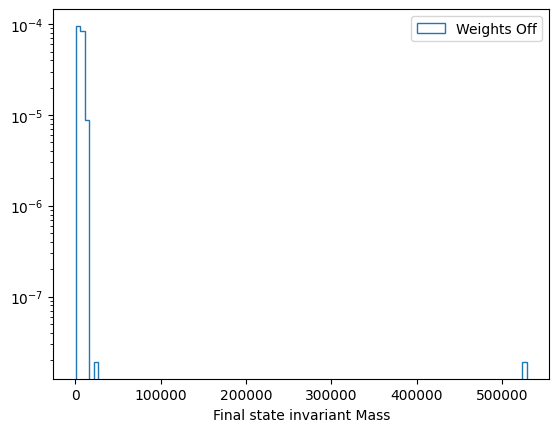

In [22]:
Mfinal =  torch.sqrt(square_t(torch.sum(p[:,2:], axis=1)))
plt.hist(Mfinal, bins=100, density=True, histtype="step", label="Weights Off")
#plt.hist(Mfinal, weights=w, bins=100, density=True, histtype="step", label="Weights ON")
plt.xlabel("Final state invariant Mass")
plt.legend()
plt.yscale("log")

In [23]:
n = 3
P = p[:,2:].clone() # copy
M = torch.tensor([0.]*n,requires_grad=False, dtype=torch.double, device=P.device)
M = torch.unsqueeze(M, 0).repeat(P.shape[0],1)
Q = torch.zeros_like(P)
Q[:,-1] = P[:,-1]  # Qn = pn
#M[:, -1] = torch.sqrt(square_t(P[:, -1], axis=1)))
# intermediate mass
for i in range(n, 0, -1):
    j = i-1
    M[:, j] = torch.sqrt(square_t(torch.sum(P[:, j:n], axis=1)))
    # Rimuovere la massa delle particelle finali
    M[:, j] -= torch.sum(final_masses[j:])

r = torch.zeros(P.shape[0], 5)

In [26]:
for i in range(n, 1, -1):
    j = i-1 #index for 0-based tensors
    # in the direct algo the u are squared. 
    u = (M[:, j]/M[:, j-1])**2
    
    r[:, j-1] = (n+1-i)*(torch.pow(u,(n-i))) - (n-i)*(torch.pow(u,(n+1-i)))
    
    Q[:, j-1] = Q[:, j] + P[:, j-1]
    
    boost_t(P[:, j-1], -boostVector_t(Q[:, j-1]))
   
    r[:, n-5+2*i-1] = ((P[:, j-1, 3]/ torch.sqrt(rho2_t(P[:, j-1]))) + 1)/2
    phi = torch.atan(P[:, j-1, 2]/P[:, j-1, 1])
    # Fixing phi depending on X and y sign
    # 4th quandrant  (px > 0, py < 0)
    deltaphi = torch.where((P[:, j-1, 2]<0)&(P[:, j-1, 1]>0), 2*torch.pi, 0.)
    # 2th and 3th quadratant  (px < 0, py whatever)
    deltaphi += torch.where((P[:, j-1, 1]<0), torch.pi, 0.)
    phi += deltaphi
    r[:, n-4+2*i-1] = phi/(2*torch.pi)
    print(j-1, n-5+2*i-1, n-4+2*i-1)
    print(r[0:5])
    

1 3 4
tensor([[0.0000, 1.0000, 0.0000, 0.8842, 0.7882],
        [0.0000, 1.0000, 0.0000, 0.9937, 0.8363],
        [0.0000, 1.0000, 0.0000, 0.5571, 0.0240],
        [0.0000, 1.0000, 0.0000, 0.8291, 0.8737],
        [0.0000, 1.0000, 0.0000, 0.4820, 0.9691]])
0 1 2
tensor([[0.0778, 0.6976, 0.6670, 0.8842, 0.7882],
        [0.7055, 0.6792, 0.5302, 0.9937, 0.8363],
        [0.9234, 0.0859, 0.0598, 0.5571, 0.0240],
        [0.9368, 0.5032, 0.3659, 0.8291, 0.8737],
        [0.0058, 0.8248, 0.8576, 0.4820, 0.9691]])


In [27]:
r_initial[0:5, 0:5]

tensor([[0.0778, 0.6976, 0.6670, 0.8842, 0.7882],
        [0.7055, 0.6792, 0.5302, 0.9937, 0.8363],
        [0.9234, 0.0859, 0.0598, 0.5571, 0.0240],
        [0.9368, 0.5032, 0.3659, 0.8291, 0.8737],
        [0.0058, 0.8248, 0.8576, 0.4820, 0.9691]])

In [28]:
r_initial[0:15, 0:5] - r[0:15]

tensor([[ 5.5511e-17,  0.0000e+00,  0.0000e+00,  1.1102e-16,  1.1102e-16],
        [ 2.2204e-16,  0.0000e+00,  1.1102e-16,  0.0000e+00,  1.1102e-16],
        [ 2.2204e-16,  5.5511e-17, -1.3878e-17,  0.0000e+00, -1.3878e-17],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 3.1225e-17,  0.0000e+00,  0.0000e+00, -7.7716e-16,  2.2204e-16],
        [ 3.3307e-16,  0.0000e+00,  5.5511e-17,  0.0000e+00,  5.5511e-17],
        [-2.2204e-16, -5.5511e-17,  5.5511e-17,  0.0000e+00,  0.0000e+00],
        [ 1.0408e-16,  0.0000e+00,  0.0000e+00,  0.0000e+00,  4.4409e-16],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  5.5511e-17],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  2.7756e-17],
        [ 1.1102e-16,  0.0000e+00, -1.3878e-17,  0.0000e+00,  0.0000e+00],
        [-1.1102e-16,  1.1102e-16,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.1102e-16,  1.1102e-16,  0.0000e+00,  0.0000e+00, -1.1102e-16],
        [ 2.7756e-17, -5.

(array([4952., 4937., 4993., 5043., 4882., 4891., 4974., 5047., 4928.,
        5073.]),
 array([6.46619209e-07, 9.99998585e-02, 1.99999070e-01, 2.99998282e-01,
        3.99997494e-01, 4.99996706e-01, 5.99995918e-01, 6.99995130e-01,
        7.99994342e-01, 8.99993554e-01, 9.99992766e-01]),
 <BarContainer object of 10 artists>)

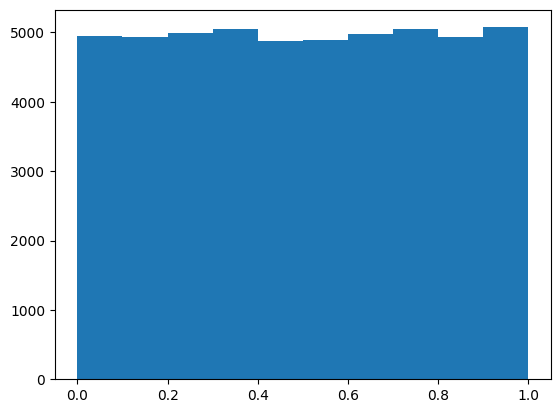

In [29]:
plt.hist(r.flatten())

Text(0.5, 0, '$\\log_{10}(|1- r_f/r_i|)$')

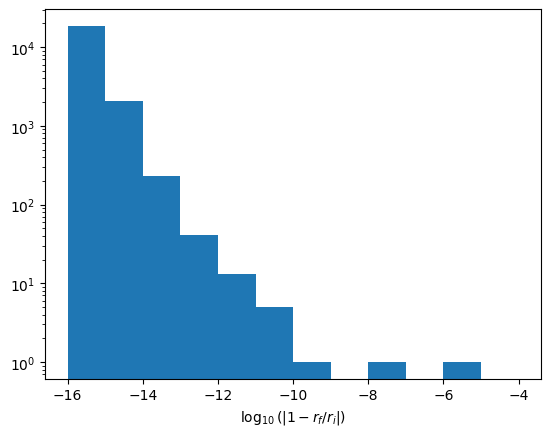

In [33]:
plt.hist(torch.log10(torch.abs(1- r/r_initial[:,:-2])).flatten(), 
        range=(-16,-4), bins=12)
plt.yscale("log")
plt.xlabel("$\log_{10}(|1- r_f/r_i|)$")

# Boost to lab frame

In [48]:
p_lab = p.clone()

In [70]:
p_lab = boost_to_lab_frame(p_lab, x1, x2)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/valsdav/code/MEM/MEMFlow/myenv/lib64/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_52379/2389694860.py", line 1, in <module>
    p_lab = boost_to_lab_frame(p_lab, x1, x2)
  File "/home/valsdav/code/MEM/MEMFlow/src/memflow/phasespace/utils.py", line 149, in boost_to_lab_frame
  File "/home/valsdav/code/MEM/MEMFlow/src/memflow/phasespace/utils.py", line 140, in boost_lf
    if not ((rho2_t(ref_lab) == 0).any()):
RuntimeError: The size of tensor a (10000) must match the size of tensor b (100000) at non-singleton dimension 0

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/valsdav/code/MEM/MEMFlow/myenv/lib64/python3.9/site-packages/IPython/core/interactiveshell.py", line 2052, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/val

Text(0, 0.5, 'Gluon px2')

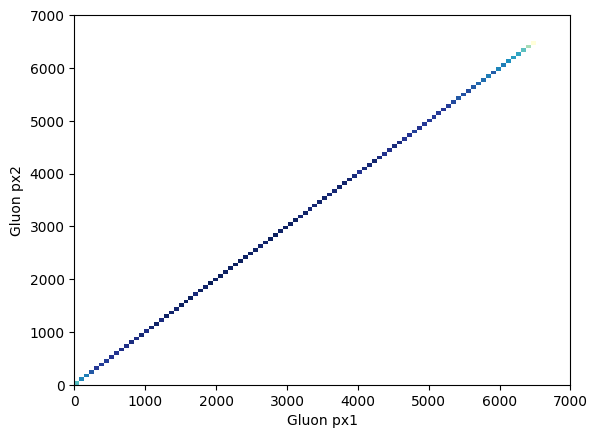

In [50]:
plt.hist2d(p[:, 0, 0].numpy(), 
           p[:, 1, 0].numpy(),
          bins=(100, 100), 
           range=((0., 7000.),(0., 7000.)),
          norm=colors.LogNorm(), cmap="YlGnBu")
plt.xlabel("Gluon px1")
plt.ylabel("Gluon px2")

Text(0, 0.5, 'Gluon E2')

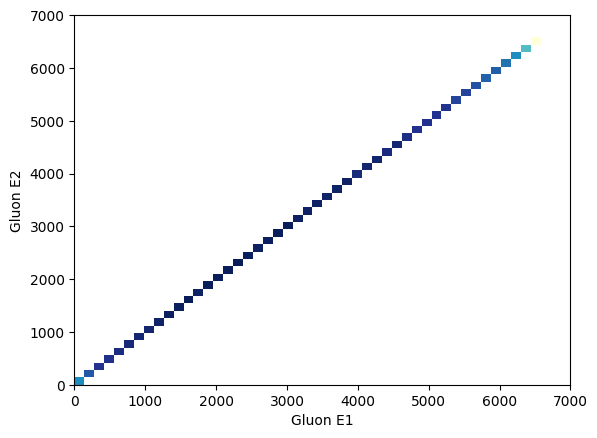

In [69]:
plt.hist2d(p_lab[:, 0, 0].numpy(), 
           p_lab[:, 1, 0].numpy(),
          bins=(50, 50), 
           range=((0., 7000.),(0., 7000.)),
          norm=colors.LogNorm(), cmap="YlGnBu")
plt.xlabel("Gluon E1")
plt.ylabel("Gluon E2")

Text(0, 0.5, 'Top1 px')

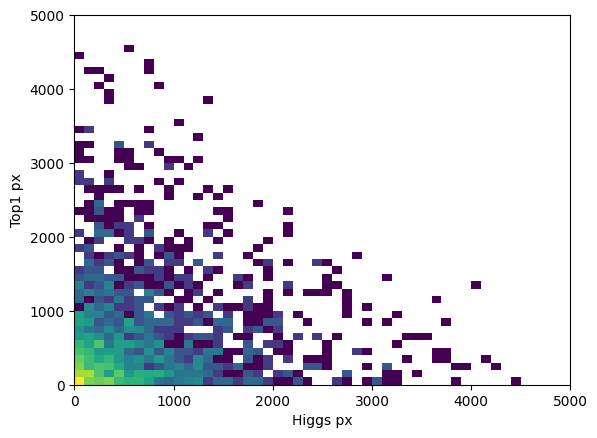

In [28]:
plt.hist2d(p[:, 2, 1].numpy(), 
           p[:, 3, 1].numpy(),
          bins=(50, 50), 
           range=((0., 5000.),(0., 5000.)),
          norm=colors.LogNorm())
plt.xlabel("Higgs px")
plt.ylabel("Top1 px")

Text(0, 0.5, 'Top1 px')

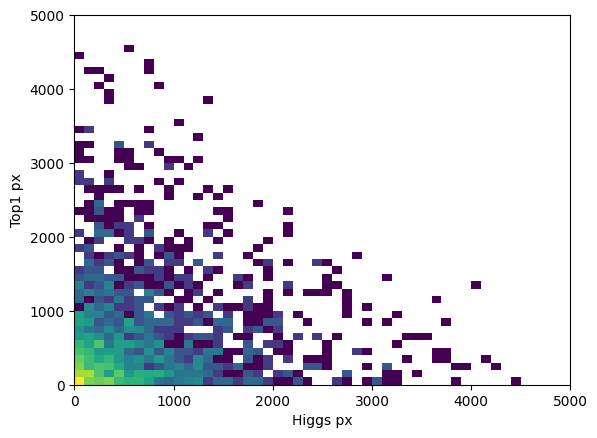

In [29]:
plt.hist2d(p_lab[:, 2, 1].numpy(), 
           p_lab[:, 3, 1].numpy(),
          bins=(50, 50), 
           range=((0., 5000.),(0., 5000.)),
          norm=colors.LogNorm())
plt.xlabel("Higgs px")
plt.ylabel("Top1 px")

Text(0, 0.5, 'Higgs px (CM)')

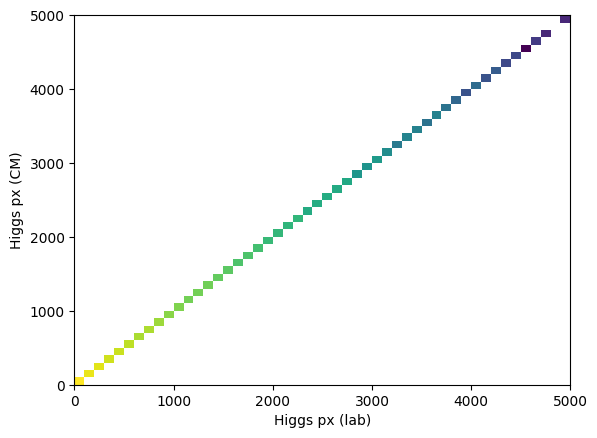

In [30]:
plt.hist2d(p_lab[:, 2, 1].numpy(), 
           p[:, 2, 1].numpy(),
          bins=(50, 50), 
           range=((0., 5000.),(0., 5000.)),
          norm=colors.LogNorm())
plt.xlabel("Higgs px (lab)")
plt.ylabel("Higgs px (CM)")

Text(0, 0.5, 'Higgs pz (CM)')

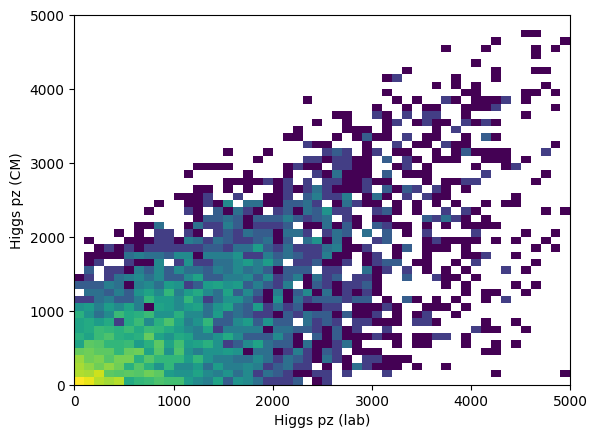

In [31]:
plt.hist2d(p_lab[:, 2, 3].numpy(), 
           p[:, 2, 3].numpy(),
          bins=(50, 50), 
           range=((0., 5000.),(0., 5000.)),
          norm=colors.LogNorm())
plt.xlabel("Higgs pz (lab)")
plt.ylabel("Higgs pz (CM)")

Text(0, 0.5, 'Top1 pz (CM)')

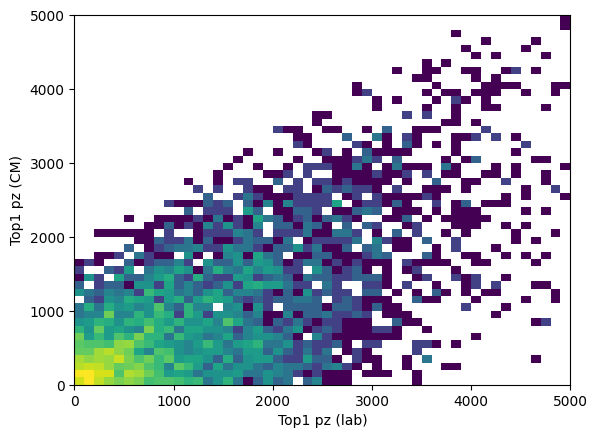

In [32]:
plt.hist2d(p_lab[:, 3, 3].numpy(), 
           p[:, 3, 3].numpy(),
          bins=(50, 50), 
           range=((0., 5000.),(0., 5000.)),
          norm=colors.LogNorm())
plt.xlabel("Top1 pz (lab)")
plt.ylabel("Top1 pz (CM)")

In [35]:
x1

tensor([0.7038, 0.5742, 0.5590,  ..., 0.6622, 0.9476, 0.1544])

In [51]:
boost = boostVector_t(p_lab[:,0, :]+p_lab[:, 1, :])

In [53]:
p[0:5]

tensor([[[ 3.1613e+03,  0.0000e+00,  0.0000e+00,  3.1613e+03],
         [ 3.1613e+03,  0.0000e+00,  0.0000e+00, -3.1613e+03],
         [ 2.3509e+03,  1.5560e+03,  1.0139e+03,  1.4360e+03],
         [ 1.0893e+03,  8.9982e+02, -5.8917e+02,  1.4809e+00],
         [ 2.8823e+03, -2.4558e+03, -4.2478e+02, -1.4375e+03]],

        [[ 3.4416e+03,  0.0000e+00,  0.0000e+00,  3.4416e+03],
         [ 3.4416e+03,  0.0000e+00,  0.0000e+00, -3.4416e+03],
         [ 1.3665e+03,  5.7349e+02,  4.8318e+02, -1.1354e+03],
         [ 2.5064e+03, -9.4473e+02,  2.3130e+03,  9.8154e+01],
         [ 3.0103e+03,  3.7124e+02, -2.7962e+03,  1.0373e+03]],

        [[ 3.5894e+03,  0.0000e+00,  0.0000e+00,  3.5894e+03],
         [ 3.5894e+03,  0.0000e+00,  0.0000e+00, -3.5894e+03],
         [ 3.0694e+03,  9.8577e+02,  1.6701e+03, -2.3759e+03],
         [ 2.0825e+03, -1.5115e+03, -1.3481e+03,  4.5279e+02],
         [ 2.0269e+03,  5.2571e+02, -3.2203e+02,  1.9231e+03]],

        [[ 2.2306e+02,  0.0000e+00,  0.0000e+00, 

In [54]:
boost_tt(p_lab, -boost.unsqueeze(1))[0:5]

tensor([[[ 3.1613e+03,  0.0000e+00,  0.0000e+00,  3.1613e+03],
         [ 3.1613e+03,  0.0000e+00,  0.0000e+00, -3.1613e+03],
         [ 2.3509e+03,  1.5560e+03,  1.0139e+03,  1.4360e+03],
         [ 1.0893e+03,  8.9982e+02, -5.8917e+02,  1.4809e+00],
         [ 2.8823e+03, -2.4558e+03, -4.2478e+02, -1.4375e+03]],

        [[ 3.4416e+03,  0.0000e+00,  0.0000e+00,  3.4416e+03],
         [ 3.4416e+03,  0.0000e+00,  0.0000e+00, -3.4416e+03],
         [ 1.3665e+03,  5.7349e+02,  4.8318e+02, -1.1354e+03],
         [ 2.5064e+03, -9.4473e+02,  2.3130e+03,  9.8154e+01],
         [ 3.0103e+03,  3.7124e+02, -2.7962e+03,  1.0373e+03]],

        [[ 3.5894e+03,  0.0000e+00,  0.0000e+00,  3.5894e+03],
         [ 3.5894e+03,  0.0000e+00,  0.0000e+00, -3.5894e+03],
         [ 3.0694e+03,  9.8577e+02,  1.6701e+03, -2.3759e+03],
         [ 2.0825e+03, -1.5115e+03, -1.3481e+03,  4.5279e+02],
         [ 2.0269e+03,  5.2571e+02, -3.2203e+02,  1.9231e+03]],

        [[ 2.2306e+02,  0.0000e+00,  0.0000e+00, 

In [33]:
p_lab

tensor([[[ 4574.8060,     0.0000,     0.0000,  4574.8060],
         [ 2184.4905,     0.0000,     0.0000, -2184.4905],
         [ 3056.2275,  1555.9627,  1013.9415,  2423.9929],
         [ 1165.1441,   899.8235,  -589.1661,   413.4195],
         [ 2537.9247, -2455.7863,  -424.7754,  -447.0970]],

        [[ 3732.1859,     0.0000,     0.0000,  3732.1859],
         [ 3173.6171,     0.0000,     0.0000, -3173.6171],
         [ 1278.8260,   573.4917,   483.1796, -1028.2768],
         [ 2522.5708,  -944.7335,  2312.9790,   301.8677],
         [ 3104.4061,   371.2419, -2796.1586,  1284.9779]],

        [[ 3633.6287,     0.0000,     0.0000,  3633.6287],
         [ 3545.7105,     0.0000,     0.0000, -3545.7105],
         [ 3040.5775,   985.7700,  1670.1301, -2338.4497],
         [ 2088.2048, -1511.4822, -1348.1014,   478.3277],
         [ 2050.5566,   525.7121,  -322.0287,  1948.0402]],

        ...,

        [[ 4304.1742,     0.0000,     0.0000,  4304.1742],
         [ 5474.9617,     0.0000,   

# X1 x2 correct generation

If we want to sample uniformly x1 and x2 of the pdf we have to incorporate the constraint from the minimum of the final state particle masses.

In the rambo generato one can use the tau=True option but that produces a non flat distribution.

In [119]:
Mfinal = torch.sum(final_masses)
min_fract = Mfinal/E_CM

In [120]:
min_fract

tensor(0.0362)

In [121]:
rnd = torch.rand(100000, 1)
rnd2 = torch.rand(100000, 1)

In [122]:
x1, w = uniform_distr(rnd, min_fract,1)

In [123]:
x1

tensor([[0.9601],
        [0.7401],
        [0.9322],
        ...,
        [0.9969],
        [0.2909],
        [0.6517]])

In [124]:
def uniform_distr_t(r,minv,maxv):
        """distributes r uniformly within (min, max), with jacobian dvariable"""
        dvariable = (maxv-minv)
        variable = minv + dvariable*r
       
        #print(dvariable)
        return variable, dvariable

In [125]:
x2, w = uniform_distr_t(rnd2, min_fract/x1, torch.ones_like(rnd2))

(array([10003., 10109.,  9965.,  9926., 10107.,  9843., 10098., 10064.,
         9887.,  9998.]),
 array([0.03624932, 0.13262409, 0.22899886, 0.32537364, 0.42174841,
        0.51812318, 0.61449796, 0.71087273, 0.8072475 , 0.90362228,
        0.99999705]),
 <BarContainer object of 10 artists>)

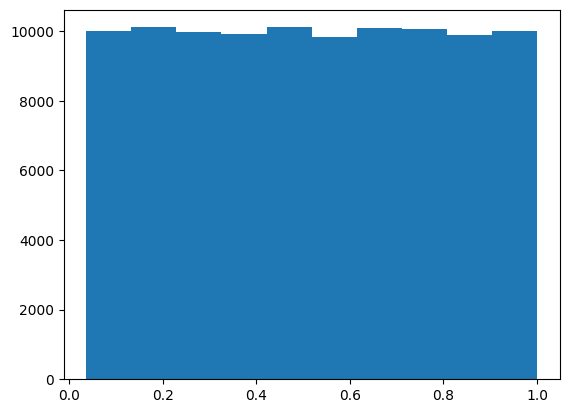

In [126]:
plt.hist(x1.flatten())

(array([ 5555.,  8426.,  9480., 10078., 10376., 10627., 11012., 11130.,
        11325., 11991.]),
 array([0.03780821, 0.13402674, 0.23024526, 0.32646378, 0.42268231,
        0.51890083, 0.61511935, 0.71133788, 0.8075564 , 0.90377492,
        0.99999345]),
 <BarContainer object of 10 artists>)

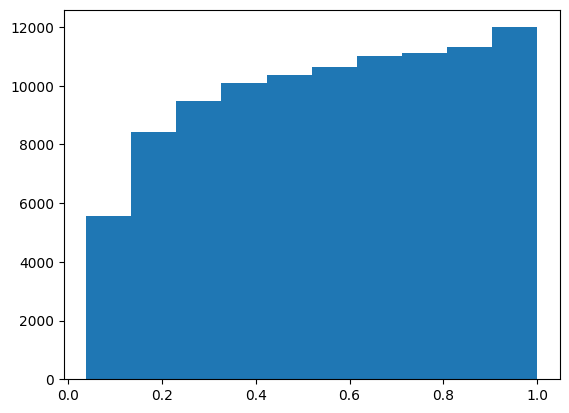

In [129]:
plt.hist(x2.flatten())

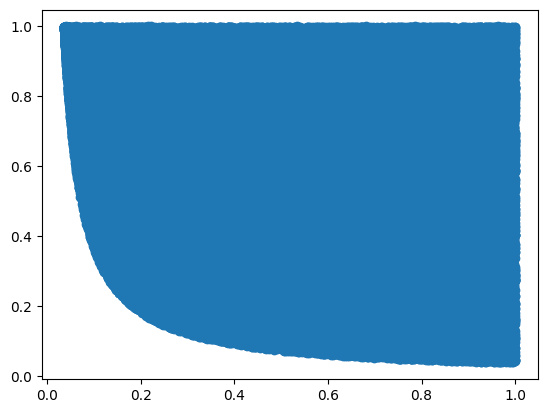

In [127]:
plt.scatter(x1.flatten(), x2.flatten())

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 15., 13., 10.],
        [ 0.,  0.,  0., ...,  9., 11., 11.],
        [ 0.,  0.,  0., ...,  9.,  8., 13.]]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 array([0.  , 0.01, 0.02, 0

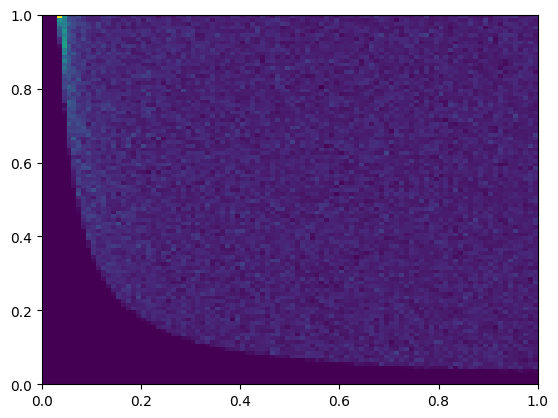

In [128]:
plt.hist2d(x1.flatten().numpy(), x2.flatten().numpy(),
          bins=(100,100), range=((0.,1.),(0.,1.))
          )

In [130]:
# Now generate partons

In [131]:
rnd_final = torch.cat((torch.rand(100000, 5), x1, x2), dim=1)

In [133]:
rnd_final.shape

torch.Size([100000, 7])

In [134]:
p, w, x1, x2 = gen.generateKinematics_batch(E_CM, rnd_final, pdgs=[21,21])

In [138]:
torch.sum(torch.isnan(p))

tensor(0)

(array([7.900e+01, 9.100e+01, 1.120e+02, 1.200e+02, 1.110e+02, 1.250e+02,
        1.580e+02, 1.410e+02, 1.800e+02, 1.640e+02, 1.740e+02, 2.080e+02,
        2.360e+02, 2.260e+02, 2.180e+02, 2.560e+02, 2.630e+02, 3.020e+02,
        2.870e+02, 3.310e+02, 3.480e+02, 3.710e+02, 3.970e+02, 4.220e+02,
        4.370e+02, 4.630e+02, 5.220e+02, 5.610e+02, 5.550e+02, 6.170e+02,
        6.350e+02, 6.280e+02, 6.570e+02, 7.100e+02, 7.700e+02, 8.120e+02,
        8.090e+02, 8.860e+02, 8.850e+02, 9.480e+02, 9.640e+02, 1.032e+03,
        1.120e+03, 1.150e+03, 1.220e+03, 1.259e+03, 1.249e+03, 1.354e+03,
        1.340e+03, 1.445e+03, 1.479e+03, 1.540e+03, 1.567e+03, 1.622e+03,
        1.685e+03, 1.775e+03, 1.854e+03, 1.825e+03, 1.854e+03, 1.957e+03,
        1.916e+03, 1.933e+03, 1.974e+03, 2.042e+03, 1.960e+03, 2.103e+03,
        2.197e+03, 2.163e+03, 2.126e+03, 2.144e+03, 2.208e+03, 2.159e+03,
        2.085e+03, 2.158e+03, 2.120e+03, 2.062e+03, 1.939e+03, 1.993e+03,
        1.979e+03, 1.869e+03, 1.812e+0

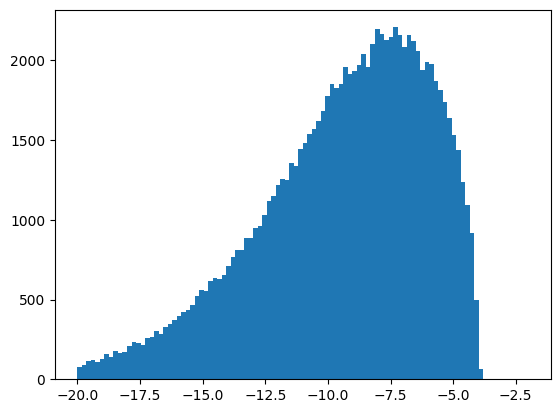

In [143]:
plt.hist(torch.log10(w), bins=100, range=(-20, -2))

Text(0.5, 0, 'Pz')

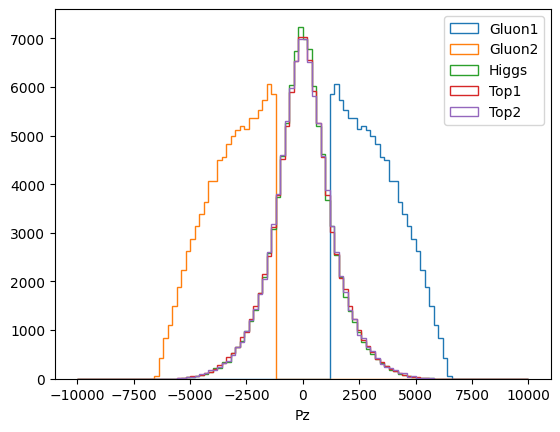

In [144]:
plt.hist(p[:,0,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(p[:,1,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,3], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

Text(0.5, 0, 'Pz')

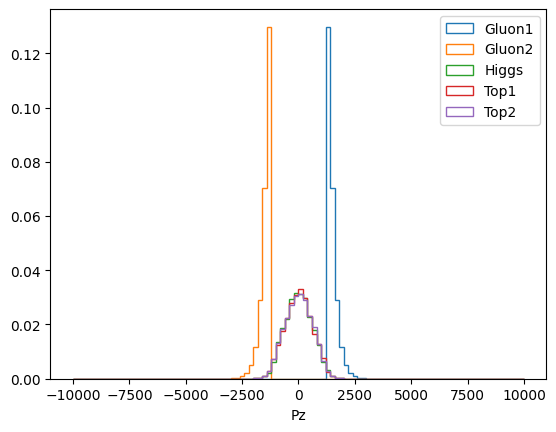

In [145]:
plt.hist(p[:,0,3], weights=w,  bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(p[:,1,3],  weights=w,bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,3], weights=w, bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,3],  weights=w,bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,3],  weights=w,bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

In [146]:
p_lab = p.clone()
boost_to_lab_frame(p_lab, x1, x2)

tensor([[[  310.9819,     0.0000,     0.0000,   310.9819],
         [ 6240.4350,     0.0000,     0.0000, -6240.4350],
         [ 3208.7177,   629.7540,  -924.1128, -3004.9305],
         [  786.6691,   250.2510,   433.4349,  -581.8169],
         [ 2556.0299,  -880.0049,   490.6779, -2342.7055]],

        [[ 5961.0181,     0.0000,     0.0000,  5961.0181],
         [ 4810.7498,     0.0000,     0.0000, -4810.7498],
         [ 1462.2005,   401.8182,  -887.9374, -1082.7982],
         [ 5581.5176,  1363.2724,    72.4780,  5409.2262],
         [ 3728.0498, -1765.0906,   815.4594, -3176.1596]],

        [[ 1838.3987,     0.0000,     0.0000,  1838.3987],
         [ 6059.5794,     0.0000,     0.0000, -6059.5794],
         [ 1824.5011,  -214.3722,  -281.5132, -1785.4724],
         [ 4110.2475,  1589.9429,   910.7740, -3675.1681],
         [ 1963.2296, -1375.5707,  -629.2608,  1239.4598]],

        ...,

        [[ 5691.4919,     0.0000,     0.0000,  5691.4919],
         [ 6480.0592,     0.0000,   

Text(0.5, 0, 'Pz')

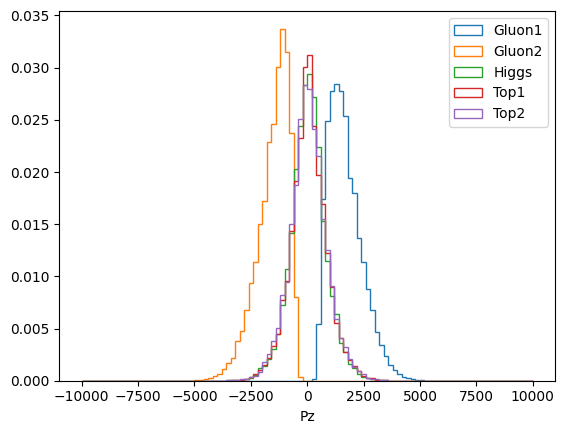

In [147]:
plt.hist(p_lab[:,0,3], weights=w,  bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(p_lab[:,1,3],  weights=w,bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(p_lab[:,2,3], weights=w, bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(p_lab[:,3,3],  weights=w,bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(p_lab[:,4,3],  weights=w,bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

Text(0, 0.5, 'Higgs pz (Lab)')

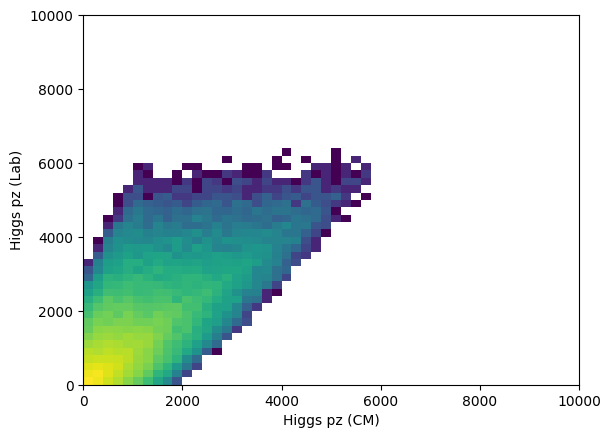

In [153]:
plt.hist2d(p[:, 2, 3].numpy(), 
           p_lab[:, 2, 3].numpy(),
          bins=(50, 50), 
           range=((0., 10000.),(0., 10000.)),
          norm=colors.LogNorm())
plt.xlabel("Higgs pz (CM)")
plt.ylabel("Higgs pz (Lab)")